# **Preprocessing**

### **Explore Data**

In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.integrate import quad
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
data = pd.read_csv("Dataset1.csv")

data.head()

,No,SKU_Code,Nama_Produk,Di,d,DL,S,ROPi,Qi,Li,Oci,Hci,Opi,Hbi,HJi
0,1,PP3,100ml Vanilla Cake,12824,1068.666667,140.536986,178.852572,190,181,0.010959,5021.75,7036.736005,23400,25350,75000
1,2,PP2,50ml Vanilla Cake,16723,1393.583333,183.265753,492.641573,305,280,0.010959,5021.75,7036.736005,12500,16750,45000
2,3,PD2,50ml Coffee Cream,3620,301.666667,39.671233,133.204104,67,98,0.010959,5021.75,7036.736005,7500,21750,45000
3,4,PP1,30ml Vanilla Cake,4672,389.333333,51.200000,94.097950,73,101,0.010959,5021.75,7036.736005,9700,13050,35000
4,5,PM3,100ml Popcorn Vanilla,1016,84.666667,11.134247,26.762706,18,43,0.010959,5021.75,7036.736005,18400,30350,75000


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           52 non-null     int64  
 1   SKU_Code     52 non-null     object 
 2   Nama_Produk  52 non-null     object 
 3   Di           52 non-null     int64  
 4   d            52 non-null     float64
 5   DL           52 non-null     float64
 6   S            52 non-null     float64
 7   ROPi         52 non-null     int64  
 8   Qi           52 non-null     int64  
 9   Li           52 non-null     float64
 10  Oci          52 non-null     float64
 11  Hci          52 non-null     float64
 12  Opi          52 non-null     int64  
 13  Hbi          52 non-null     int64  
 14  HJi          52 non-null     int64  
dtypes: float64(6), int64(7), object(2)
memory usage: 6.2+ KB


In [87]:
data.drop(columns=["No"], inplace=True)

data.head()

,SKU_Code,Nama_Produk,Di,d,DL,S,ROPi,Qi,Li,Oci,Hci,Opi,Hbi,HJi
0,PP3,100ml Vanilla Cake,12824,1068.666667,140.536986,178.852572,190,181,0.010959,5021.75,7036.736005,23400,25350,75000
1,PP2,50ml Vanilla Cake,16723,1393.583333,183.265753,492.641573,305,280,0.010959,5021.75,7036.736005,12500,16750,45000
2,PD2,50ml Coffee Cream,3620,301.666667,39.671233,133.204104,67,98,0.010959,5021.75,7036.736005,7500,21750,45000
3,PP1,30ml Vanilla Cake,4672,389.333333,51.200000,94.097950,73,101,0.010959,5021.75,7036.736005,9700,13050,35000
4,PM3,100ml Popcorn Vanilla,1016,84.666667,11.134247,26.762706,18,43,0.010959,5021.75,7036.736005,18400,30350,75000


In [88]:
data.isna().sum().sum()

0

In [89]:
data.isnull().sum()

SKU_Code       0
Nama_Produk    0
Di             0
d              0
DL             0
S              0
ROPi           0
Qi             0
Li             0
Oci            0
Hci            0
Opi            0
Hbi            0
HJi            0
dtype: int64

In [90]:
data[data.duplicated()]

,SKU_Code,Nama_Produk,Di,d,DL,S,ROPi,Qi,Li,Oci,Hci,Opi,Hbi,HJi


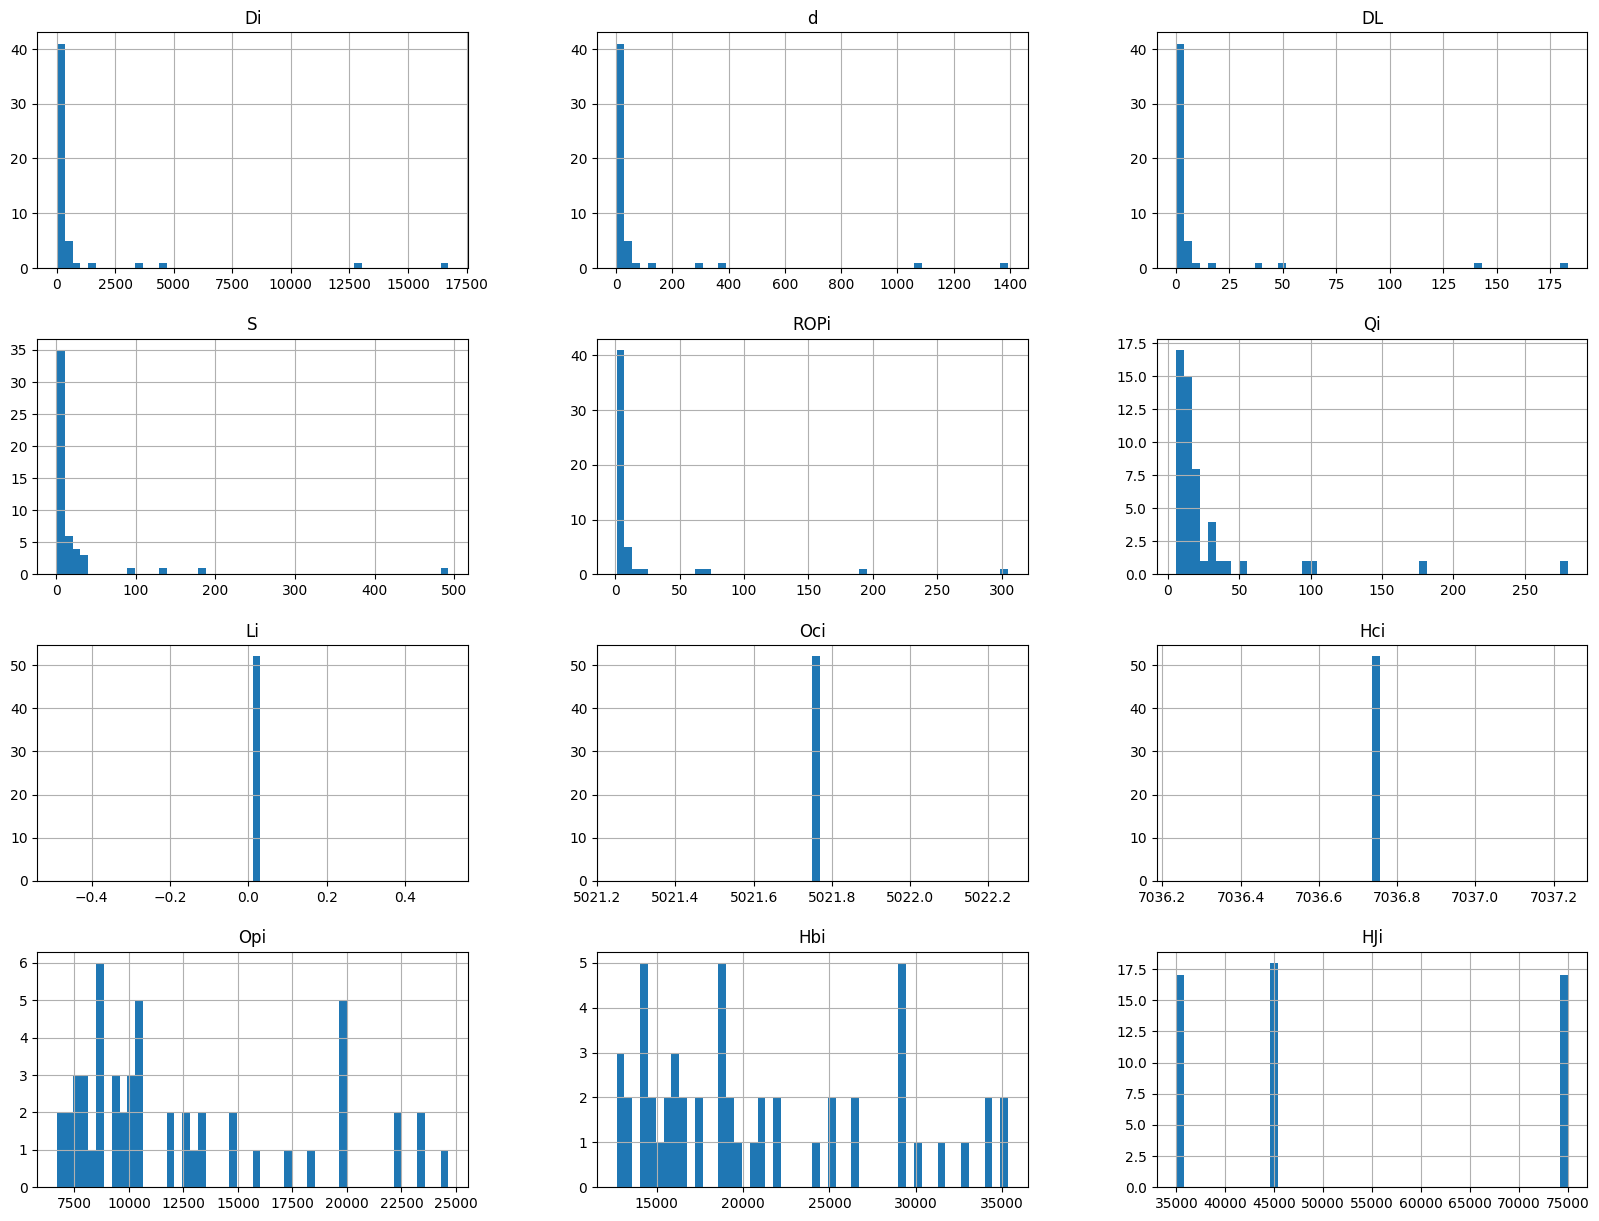

In [91]:
data.hist(bins=50, figsize=(20, 15))
plt.show()



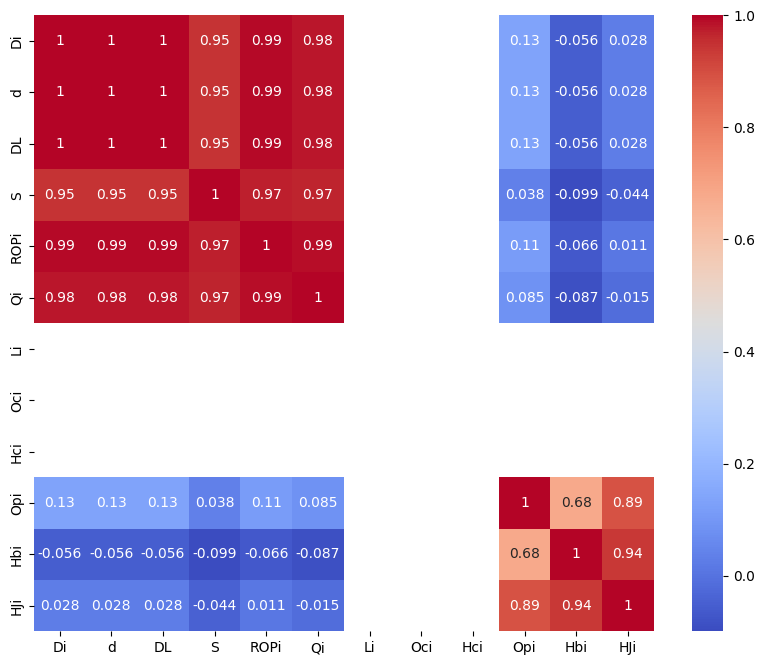

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=["SKU_Code", "Nama_Produk"]).corr(), annot=True, cmap='coolwarm')
plt.show()

In [94]:
features = ['Di', 'd', 'DL', 'S', 'Li', 'Oci','Hci','Opi','Hbi','HJi']
target_ROP = 'ROPi'
target_Q = 'Qi'

X = data[features]
y_ROP = data[target_ROP]
y_Q = data[target_Q]

X

,Di,d,DL,S,Li,Oci,Hci,Opi,Hbi,HJi
0,12824,1068.666667,140.536986,178.852572,0.010959,5021.75,7036.736005,23400,25350,75000
1,16723,1393.583333,183.265753,492.641573,0.010959,5021.75,7036.736005,12500,16750,45000
2,3620,301.666667,39.671233,133.204104,0.010959,5021.75,7036.736005,7500,21750,45000
3,4672,389.333333,51.200000,94.097950,0.010959,5021.75,7036.736005,9700,13050,35000
4,1016,84.666667,11.134247,26.762706,0.010959,5021.75,7036.736005,18400,30350,75000
5,445,37.083333,4.876712,33.765120,0.010959,5021.75,7036.736005,9325,13425,35000
6,194,16.166667,2.126027,9.916317,0.010959,5021.75,7036.736005,23400,25350,75000
7,143,11.916667,1.567123,7.751344,0.010959,5021.75,7036.736005,17150,31600,75000
8,215,17.916667,2.356164,14.902461,0.010959,5021.75,7036.736005,10000,19250,45000
9,288,24.000000,3.156164,9.438798,0.010959,5021.75,7036.736005,9325,13425,35000


In [95]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled

array([[ 4.09025397e+00,  4.09025398e+00,  4.09025397e+00,
         2.10152697e+00,  0.00000000e+00,  0.00000000e+00,
        -9.09494702e-13,  2.13909740e+00,  6.32306881e-01,
         1.39176578e+00],
       [ 5.42850188e+00,  5.42850187e+00,  5.42850188e+00,
         6.42497334e+00,  0.00000000e+00,  0.00000000e+00,
        -9.09494702e-13,  7.70879786e-03, -6.29203880e-01,
        -3.87869150e-01],
       [ 9.31178907e-01,  9.31178907e-01,  9.31178907e-01,
         1.47257344e+00,  0.00000000e+00,  0.00000000e+00,
        -9.09494702e-13, -9.69992394e-01,  1.04232609e-01,
        -3.87869150e-01],
       [ 1.29225528e+00,  1.29225528e+00,  1.29225528e+00,
         9.33761188e-01,  0.00000000e+00,  0.00000000e+00,
        -9.09494702e-13, -5.39803870e-01, -1.17194688e+00,
        -9.81080792e-01],
       [ 3.74119059e-02,  3.74119060e-02,  3.74119061e-02,
         6.00299309e-03,  0.00000000e+00,  0.00000000e+00,
        -9.09494702e-13,  1.16139620e+00,  1.36574337e+00,
         1.

In [96]:
data

,SKU_Code,Nama_Produk,Di,d,DL,S,ROPi,Qi,Li,Oci,Hci,Opi,Hbi,HJi
0,PP3,100ml Vanilla Cake,12824,1068.666667,140.536986,178.852572,190,181,0.010959,5021.75,7036.736005,23400,25350,75000
1,PP2,50ml Vanilla Cake,16723,1393.583333,183.265753,492.641573,305,280,0.010959,5021.75,7036.736005,12500,16750,45000
2,PD2,50ml Coffee Cream,3620,301.666667,39.671233,133.204104,67,98,0.010959,5021.75,7036.736005,7500,21750,45000
3,PP1,30ml Vanilla Cake,4672,389.333333,51.200000,94.097950,73,101,0.010959,5021.75,7036.736005,9700,13050,35000
4,PM3,100ml Popcorn Vanilla,1016,84.666667,11.134247,26.762706,18,43,0.010959,5021.75,7036.736005,18400,30350,75000
5,PB1,30ml Cappucino,445,37.083333,4.876712,33.765120,11,30,0.010959,5021.75,7036.736005,9325,13425,35000
6,PC3,100ml Chocolate Fudge,194,16.166667,2.126027,9.916317,5,19,0.010959,5021.75,7036.736005,23400,25350,75000
7,PL3,100ml Popcorn Caramel,143,11.916667,1.567123,7.751344,3,16,0.010959,5021.75,7036.736005,17150,31600,75000
8,BLA1,Body Lotion Vanilla Cake,215,17.916667,2.356164,14.902461,5,20,0.010959,5021.75,7036.736005,10000,19250,45000
9,PA1,30ml Bubblegum,288,24.000000,3.156164,9.438798,5,22,0.010959,5021.75,7036.736005,9325,13425,35000


In [97]:
def EBO(Q, ROP, DL, S):
    mean_demand = DL
    std_demand = np.sqrt(DL) * S
    
    def integrand(x):
        return (x - ROP) * norm.pdf(x, loc=mean_demand, scale=std_demand)
    
    ebo_value, _ = quad(integrand, ROP, ROP + Q)
    return ebo_value

def cost_function(params, Di, DL, S, Oci, Hci, Opi, Hbi):
    Q, ROP = params
    EBO_value = EBO(Q, ROP, DL, S)
    total_cost = Oci * (Di / Q) + Hci * (Q / 2 + ROP - DL) + Opi * (EBO_value * Di / Q) + Hbi * Di
    return total_cost

def performance_score(params, Di, DL, S, Oci, Hci, Opi, Hbi, HJi, W1, W2):
    Q, ROP = params
    EBO_value = EBO(Q, ROP, DL, S)
    total_cost = cost_function(params, Di, DL, S, Oci, Hci, Opi, Hbi)
    revenue = Di * HJi
    profit = revenue - total_cost
    fill_rate = 1 - (EBO_value / Q)
    PS = W1 * profit + W2 * fill_rate
    return -PS

In [98]:
optimized_params = []
W1, W2 = 0.7, 0.3  

for i in range(len(data)):
    initial_guess = [50, 50]  
    row = data.loc[i]
    result = minimize(performance_score, initial_guess, args=(row['Di'], row['DL'], row['S'], row['Oci'], row['Hci'], row['Opi'], row['Hbi'], row['HJi'], W1, W2),
                      method='L-BFGS-B', bounds=[(1, 200), (1, 100)])
    optimized_params.append(result.x)
    print(f"Row {i}: Initial guess: {initial_guess}, Optimized: {result.x}, Cost: {result.fun}")

optimized_params_df = pd.DataFrame(optimized_params, columns=['Optimized_Q', 'Optimized_ROP'])
data['Optimized_Q'] = optimized_params_df['Optimized_Q']
data['Optimized_ROP'] = optimized_params_df['Optimized_ROP']

Row 0: Initial guess: [50, 50], Optimized: [45.04371156  1.        ], Cost: -444384766.4171712
Row 1: Initial guess: [50, 50], Optimized: [92.71942778  1.        ], Cost: -330327027.4207895
Row 2: Initial guess: [50, 50], Optimized: [42.69162181  1.        ], Cost: -58509896.7150874
Row 3: Initial guess: [50, 50], Optimized: [37.20562077  1.        ], Cost: -71150121.84106797
Row 4: Initial guess: [50, 50], Optimized: [10.61079531  1.        ], Cost: -31132427.164211765
Row 5: Initial guess: [50, 50], Optimized: [12.4134526  1.       ], Cost: -6486902.819226045
Row 6: Initial guess: [50, 50], Optimized: [21.22315573 28.08421206], Cost: -6501000.894645089
Row 7: Initial guess: [50, 50], Optimized: [18.29879194 17.12269762], Cost: -4174647.579222353
Row 8: Initial guess: [50, 50], Optimized: [7.11104338 1.        ], Cost: -3666196.1579525885
Row 9: Initial guess: [50, 50], Optimized: [25.91408914 27.0813947 ], Cost: -4090035.3803617125
Row 10: Initial guess: [50, 50], Optimized: [6.79335

In [99]:
data['EBO'] = data.apply(lambda row: EBO(row['Optimized_Q'], row['Optimized_ROP'], row['DL'], row['S']), axis=1)
data['EBO'] = round(data['EBO'], 5)

data['FRi'] = 1 - data['EBO'] / data['Optimized_Q']

total_fill_rate = np.sum((1 - data['EBO'] / data['Optimized_Q']) * data['Di']) / np.sum(data['Di'])
print(f'Total Fill Rate: {total_fill_rate:.2f}')

Total Fill Rate: 0.99


In [100]:
if total_fill_rate < 0.95:
    print('Total Fill Rate constraint not met')

if np.sum(data['Optimized_Q'] * data['Di']) > 0.8 * np.sum(data['HJi'] * data['Di']):
    print('Total Cost constraint not met')

if abs(W1 + W2 - 1) > 1e-6:
    raise ValueError('Weight ratios constraint not met')

In [101]:
data['TCi'] = data.apply(lambda row: cost_function([row['Optimized_Q'], row['Optimized_ROP']], row['Di'], row['DL'], row['S'], row['Oci'], row['Hci'], row['Opi'], row['Hbi']), axis=1).round(5)
data['PRi'] = round(data['HJi'] * data['Di'] - (data['Oci'] * (data['Di'] / data['Optimized_Q']) + data['Hci'] * (data['Optimized_Q'] / 2 + data['Optimized_ROP'] - data['DL']) + data['Opi'] * (data['EBO'] * data['Di'] / data['Optimized_Q']) + data['Hbi'] * data['Di']), 5)
data['PSi'] = data.apply(lambda row: W1 * row['PRi'] + W2 * row['FRi'], axis=1).round(5)
data['Revenue'] = round(data['Di'] * data['HJi'], 5)

print('Performance Scores for each SKU:')
print(data[['SKU_Code', 'PSi']])
data_sorted = data.sort_values(by='PSi', ascending=False)
print('Sorted SKUs by Performance Score:')
print(data_sorted[['SKU_Code', 'PSi']])

Performance Scores for each SKU:
   SKU_Code           PSi
0       PP3  4.443848e+08
1       PP2  3.303270e+08
2       PD2  5.850990e+07
3       PP1  7.115012e+07
4       PM3  3.113243e+07
5       PB1  6.486903e+06
6       PC3  6.501001e+06
7       PL3  4.174648e+06
8      BLA1  3.666196e+06
9       PA1  4.090035e+06
10      PJ2  2.933174e+06
11      PD1  1.852813e+07
12      PM2  1.120171e+07
13      PL2  8.832037e+06
14      PA2  9.928174e+06
15      PC2  8.744678e+06
16      PN2  5.476634e+06
17      PA3  7.497300e+06
18      PB3  7.342310e+06
19      PG2  4.164670e+06
20      PE2  1.425653e+06
21      PO2  1.793541e+06
22      PG3  2.600542e+06
23      PF3  1.339766e+06
24      PQ2  1.590880e+06
25      PN1  1.237909e+06
26      PJ1  1.265043e+06
27      PK2  1.408953e+06
28      PK3  1.422767e+06
29      PL1  1.062498e+06
30      PD3  2.428289e+06
31      PF1  7.879191e+05
32      PG1  1.149929e+06
33      PE1  7.533844e+05
34      PC1  9.980285e+05
35      PO1  8.379213e+05
36   

In [102]:
mse_ROP = mean_squared_error(data['ROPi'], data['Optimized_ROP'])
mse_Q = mean_squared_error(data['Qi'], data['Optimized_Q'])
print(f'MSE untuk ROP: {mse_ROP:.2f}')
print(f'MSE untuk Q: {mse_Q:.2f}')

mape_ROP = mean_absolute_percentage_error(data['ROPi'], data['Optimized_ROP']) * 100
mape_Q = mean_absolute_percentage_error(data['Qi'], data['Optimized_Q']) * 100
print(f'MAPE untuk ROP: {mape_ROP:.2f}%')
print(f'MAPE untuk Q: {mape_Q:.2f}%')

MSE untuk ROP: 2775.98
MSE untuk Q: 1255.78
MAPE untuk ROP: 187.69%
MAPE untuk Q: 26.90%


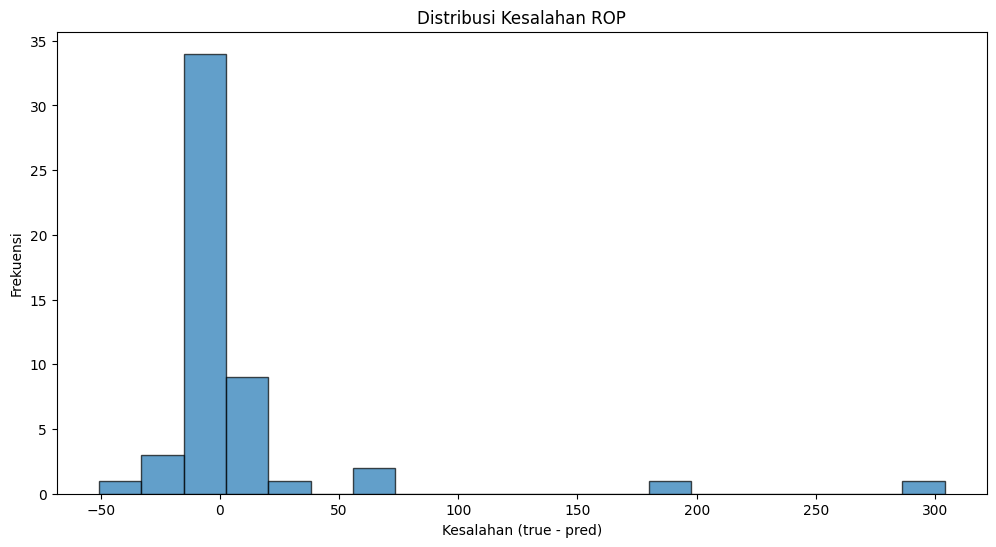

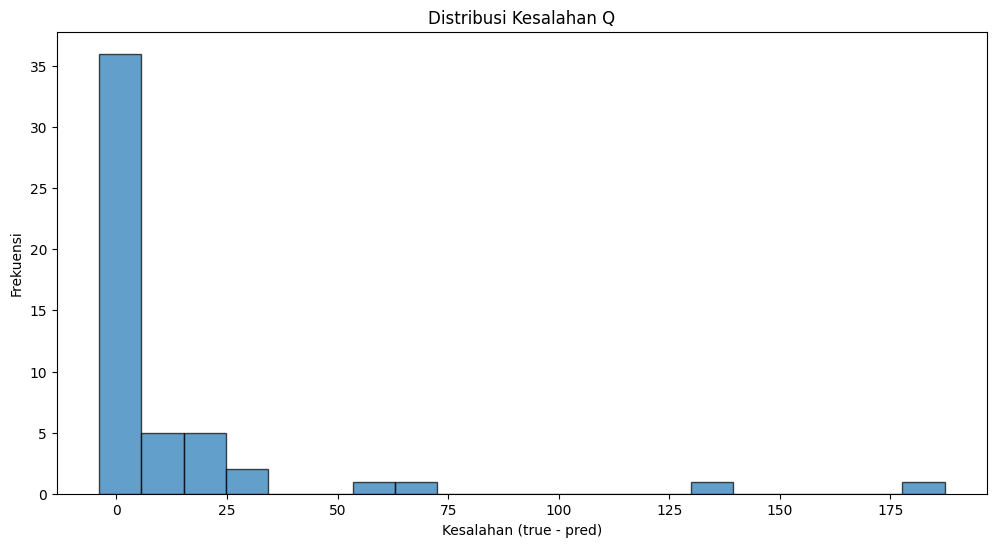

In [103]:
errors_ROP = data['ROPi'] - data['Optimized_ROP']
plt.figure(figsize=(12, 6))
plt.hist(errors_ROP, bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribusi Kesalahan ROP')
plt.xlabel('Kesalahan (true - pred)')
plt.ylabel('Frekuensi')
plt.show()

errors_Q = data['Qi'] - data['Optimized_Q']
plt.figure(figsize=(12, 6))
plt.hist(errors_Q, bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribusi Kesalahan Q')
plt.xlabel('Kesalahan (true - pred)')
plt.ylabel('Frekuensi')
plt.show()

In [104]:
data.drop(columns=["Di","d","DL","S","ROPi","Qi","Li","Oci","Hci","Opi","Hbi","HJi"])

,SKU_Code,Nama_Produk,Optimized_Q,Optimized_ROP,EBO,FRi,TCi,PRi,PSi,Revenue
0,PP3,100ml Vanilla Cake,45.043712,1.000000,0.19062,0.995768,3.269646e+08,6.348354e+08,4.443848e+08,961800000
1,PP2,50ml Vanilla Cake,92.719428,1.000000,0.25708,0.997227,2.806392e+08,4.718958e+08,3.303270e+08,752535000
2,PD2,50ml Coffee Cream,42.691622,1.000000,0.43326,0.989851,7.931443e+07,8.358557e+07,5.850990e+07,162900000
3,PP1,30ml Vanilla Cake,37.205621,1.000000,0.40977,0.988986,6.187697e+07,1.016430e+08,7.115012e+07,163520000
4,PM3,100ml Popcorn Vanilla,10.610795,1.000000,0.25124,0.976322,3.172510e+07,4.447490e+07,3.113243e+07,76200000
5,PB1,30ml Cappucino,12.413453,1.000000,0.41119,0.966875,6.307996e+06,9.267004e+06,6.486903e+06,15575000
6,PC3,100ml Chocolate Fudge,21.223156,28.084212,0.19505,0.990810,5.262856e+06,9.287144e+06,6.501001e+06,14550000
7,PL3,100ml Popcorn Caramel,18.298792,17.122698,0.21886,0.988040,4.761218e+06,5.963782e+06,4.174648e+06,10725000
8,BLA1,Body Lotion Vanilla Cake,7.111043,1.000000,0.43500,0.938828,4.437577e+06,5.237422e+06,3.666196e+06,9675000
9,PA1,30ml Bubblegum,25.914089,27.081395,0.53411,0.979389,4.237093e+06,5.842907e+06,4.090035e+06,10080000


In [106]:
data.drop(columns=["Di","d","DL","S","ROPi","Qi","Li","Oci","Hci","Opi","Hbi","HJi"]).to_excel("ebo.xlsx", engine='openpyxl')